In [ ]:
# importing all the libraries that we needed
#in this deep learning model we are using transfer learning techniques and using keras library
 
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import  image
from keras.preprocessing.image import  ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset and storing it into train and testpaths

trainpath = "/content/drive/MyDrive/Colab Notebooks/trainset_OR/train"
testpath = "/content/drive/MyDrive/Colab Notebooks/trainset_OR/test"

In [ ]:
#re-sizing the images to this size

IMAGE_SIZE = (224, 224,3)

In [ ]:
# importing Image data generator to tread all the images from all the classes 

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.5/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1.5/255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/trainset_OR/train',
                                                  target_size = (224,224),
                                                  batch_size = 50,)
                                                
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/trainset_OR/test',
                                             target_size =(224,224),
                                             batch_size = 50,)
                                        



Found 1816 images belonging to 6 classes.
Found 2603 images belonging to 6 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#adding pre processing layer to the front of vgg

vgg = VGG16(("input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top = False"))

553467904/553467096 [==============================] - 4s 0us/step


In [ ]:
# adding the last laye sby using dense amd appending is to the flattened layer 

x =Flatten()(vgg.layers[-1].output)
class1 = Dense(1024, activation='relu')(x)
prediction = Dense(units=6, activation="softmax")(class1)
vgg = Model(inputs=vgg.input, outputs=prediction)
# viewing the structutre of the model so we  ay know how the structure is

vgg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# compiling the moodel 
vgg.compile(
              loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [ ]:
# fitting the model by using 
r = vgg.fit(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/10
31/37 [========================>.....] - ETA: 1:47 - loss: 1.5135 - accuracy: 0.6773

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)


37/37 [==============================] - 1546s 42s/step - loss: 1.4637 - accuracy: 0.6891 - val_loss: 2.8758 - val_accuracy: 0.0184
Epoch 2/10
37/37 [==============================] - 65s 2s/step - loss: 0.9524 - accuracy: 0.7525 - val_loss: 2.5956 - val_accuracy: 0.0184
Epoch 3/10
37/37 [==============================] - 64s 2s/step - loss: 0.8940 - accuracy: 0.7686 - val_loss: 2.5348 - val_accuracy: 0.0184
Epoch 4/10
37/37 [==============================] - 63s 2s/step - loss: 0.8792 - accuracy: 0.7757 - val_loss: 2.5080 - val_accuracy: 0.0184
Epoch 5/10
37/37 [==============================] - 63s 2s/step - loss: 0.9151 - accuracy: 0.7642 - val_loss: 2.5405 - val_accuracy: 0.0184
Epoch 6/10
37/37 [==============================] - 63s 2s/step - loss: 0.8782 - accuracy: 0.7764 - val_loss: 2.5136 - val_accuracy: 0.0184
Epoch 7/10
37/37 [==============================] - 63s 2s/step - loss: 0.8826 - accuracy: 0.7750 - val_loss: 2.5153 - val_accuracy: 0.0184
Epoch 8/10
37/37 [==========

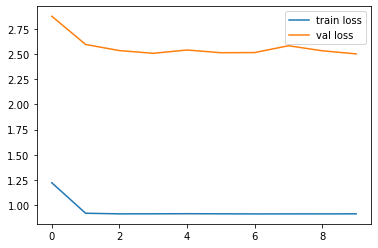

In [ ]:
plt.plot(r.history['loss'], label ='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show
plt.savefig('LossVal_accuracy')

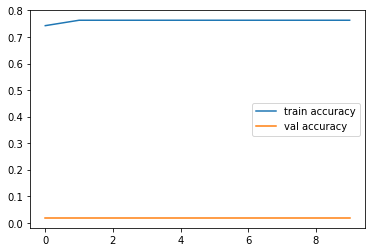

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('Accval_accuracy')

In [ ]:
import tensorflow as tf
from keras.models import load_model
vgg.save('/content/drive/MyDrive/Colab Notebooks/Fcae_New_model.h5')

In [ ]:
ls -ltr "/content/drive/MyDrive/Colab Notebooks/trainset_OR/train"

total 24
drwx------  15 root root 4096 Dec 19 05:17 0009/
drwx------  44 root root 4096 Dec 19 05:17 0006/
drwx------  29 root root 4096 Dec 19 05:17 0005/
drwx------  22 root root 4096 Dec 19 05:17 0001/
drwx------  22 root root 4096 Dec 19 05:17 0014/
drwx------ 346 root root 4096 Dec 19 05:17 0013/
